In [66]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (15,12)

# Question 1

## Part A

#### A1, Part 1:

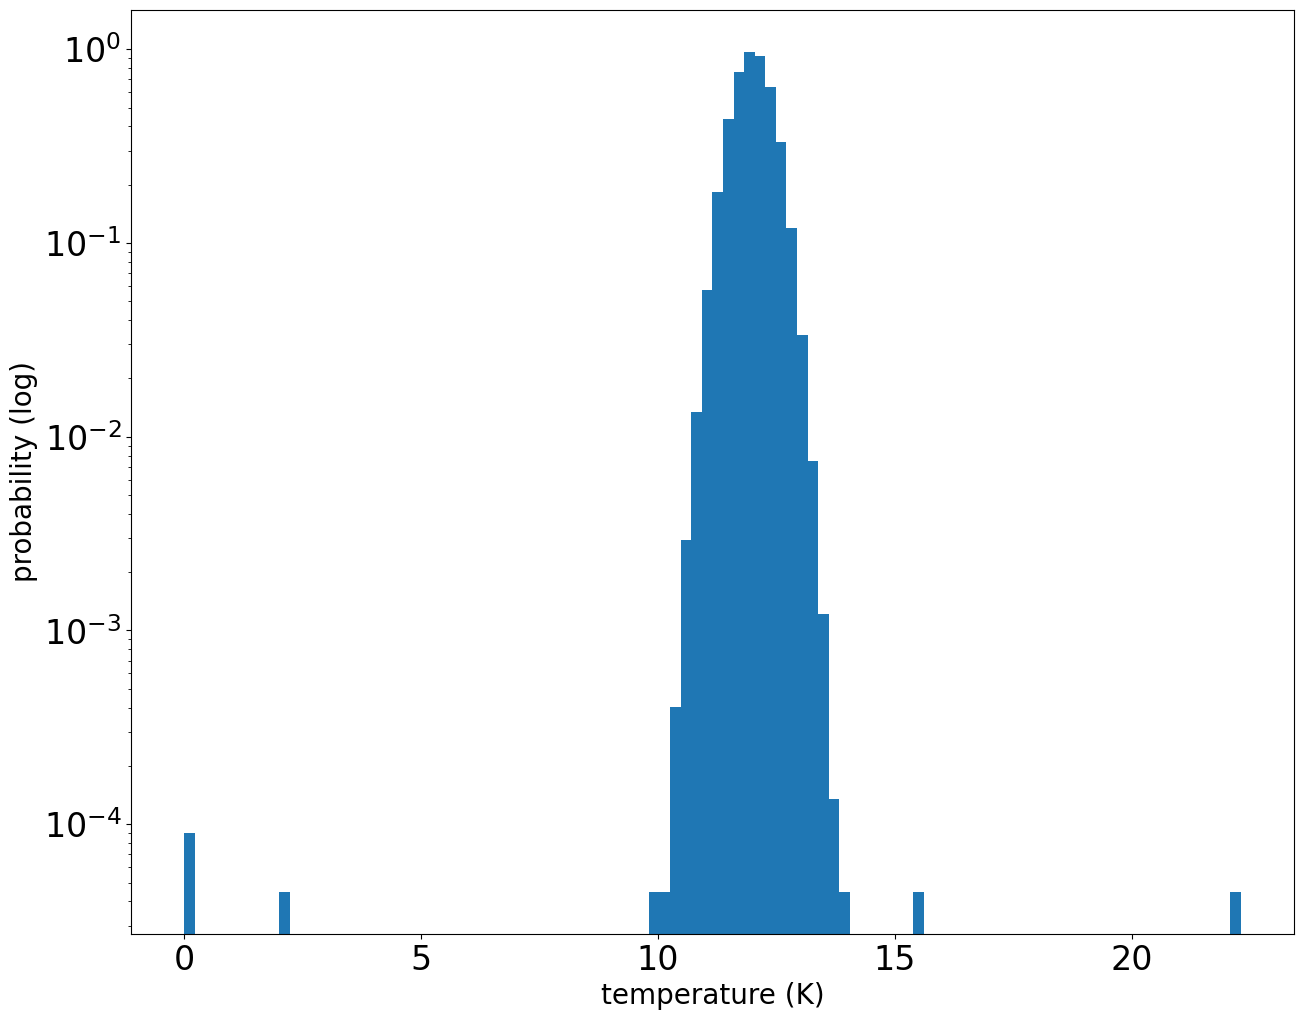

In [67]:
d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
d_sorted = d.sort()
fig, ax = plt.subplots(1, 1)
ax.hist(d,100, density=True)
plt.tick_params(labelsize = 24)
plt.yscale('log')
plt.xlabel('temperature (K)', size = '20')
plt.ylabel('probability (log)', size = '20')
plt.show()

Our background pdf is a normal distribution. Identifying bad data is going to have to come from treating our datapoints as potential results and ruling any statistically significant background data out.

#### A1, Part 2:
Assuming our background data with *n* points is normally distributed, how many datapoints have a location with an expected probabilty greater than *1/n*? 

Ideally, if our data was normally distributed, we would cut off around 1 datapoint on each side. This number can have a little bit of leeway to it because losing a few datapoints out of 10<sup>5</sup> isn't a huge deal. Our algorithm has a few key assumptions as well. Mainly that real data is much more common than anomalous data(us having a "peek behind the curtain" allows confirmation of this fact), and, due to this, as stated earlier, removing some good data is less costly than weeding out bad data.

In [68]:
cutoff_x_left = stats.norm.ppf((1/100008), loc = 12, scale = 0.4)

interval = 12 - cutoff_x_left

cutoff_x_right = 12 + interval

print(interval/sd_test)

4.209362366013018


Assuming we cut off around the 1/100008 mark, our truth table should look roughly like the following:

|             | True Temp.  |True Anomaly|
| ----------- | ----------- | ---------- |
| Alg. Temp.  |     99998?   |         2? |
| Alg. Anomaly|         2?  |         6? |

We would expect to cut off only one data point on each side on average, assuming everything followed a normal distribution. Anything with a sigma higher than our value of 4.21 is very likely to be bad data.

#### A1, Part 3:

We are cutting off data where the ppf is greater or less than what would be expected in *n* number of trials, where *n* = 100008.

In [69]:
#cut off data outside of our expected range

counter = 0

for x in d:
    if x < cutoff_x_left or x > cutoff_x_right:
        d = np.delete(d, counter)
    else:
        counter += 1

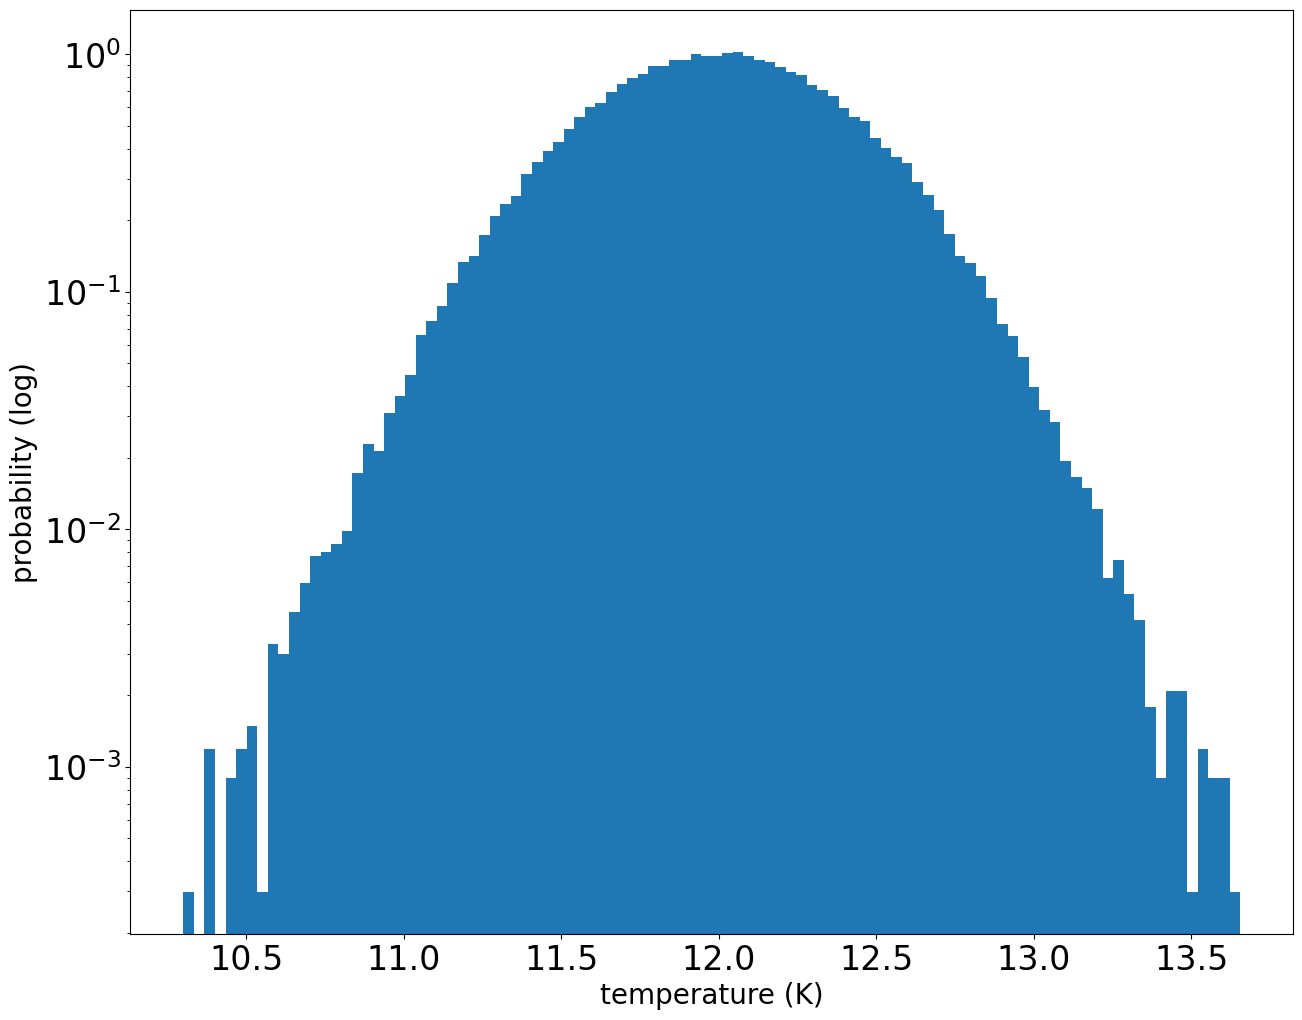

In [70]:
fig, ax = plt.subplots(1, 1)
ax.hist(d,100, density=True)
plt.tick_params(labelsize = 24)
plt.yscale('log')
plt.xlabel('temperature (K)', size = '20')
plt.ylabel('probability (log)', size = '20')
plt.show()

In [71]:
len(d)

100000

#### A1, Part 4:
We can see that a total of ~8 datapoints were cut off by the algorithm. 6 bad datapoints and ~2 good ones, which is what we roughly expected. (These values may change based on random input data)

|             | True Temp.  |True Anomaly|
| ----------- | ----------- | ---------- |
| Alg. Temp.  |     ~99998   |         2 |
| Alg. Anomaly|         ~2   |         6 |

## Part B:

Due to the way I structured my algorithm, the number of good datapoints lost was predictable. Changing the "filter" on my algorithm would change the number of good datapoints being omitted in a similarly predictable nature. However, the bad data is inherently extremely variant in nature and tough to predict. I only was able to make a prediction about how much false data my algorithm would catch due to having the data on hand.

## Part C:

The commision-mistakes, as I started on above, are very difficult to distinguish from the data that we were given. Even the 10.3 value that ended up on the end of my trimmed data (the value of which I suspect was chosen for this very specific reason!) is almost impossible to distinguish from the rest of the data. If the bad data is of low enough significance, there is no real way to spot it unless one were able to generate bad data on purpose and fashion a background distribution for the bad data itself. As real-world bad data can come from many sources, this excersise would be fruitless in practice. 

# Question 2

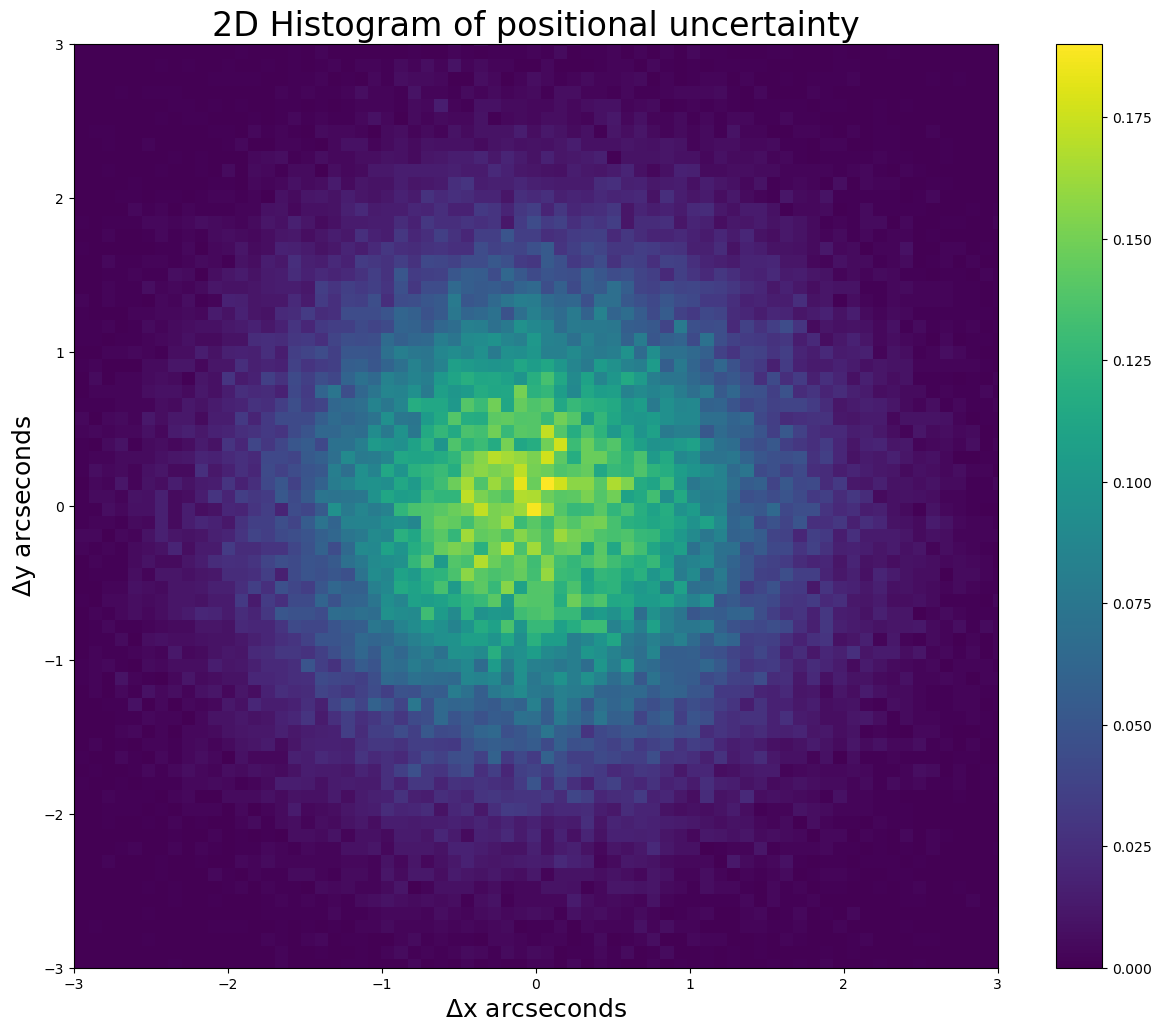

In [51]:
a = np.vstack((stats.norm.rvs( scale = 1, size = 100000), stats.norm.rvs( scale = 1, size = 100000)))
a.shape
fig, ax = plt.subplots(1, 1)
h = ax.hist2d(a[0,:],a[1,:],bins=100, density=True);
ax.set_aspect('equal', 'box')
plt.xlim([-3 , 3])
plt.ylim([-3 , 3])
plt.title("2D Histogram of positional uncertainty", fontsize = 24)
plt.ylabel("$\Delta$y arcseconds", fontsize = 18)
plt.xlabel("$\Delta$x arcseconds", fontsize = 18)
plt.colorbar(h[3], ax=ax)

#### Part 1:

What is the probability that our movement data is not simply describing phenomenon attributable to measurement error? How far of a movement is needed for a 5 sigma event?

#### Part 2:

At what point does the integral of the cdf of each of the two seperate normal distributions return a probability of five sigma?

In [58]:
five_sigma = stats.norm.cdf(5,0,1)

prob_five_sigma = 1 - five_sigma

print('probabilty(five sigma) = {}'.format(prob_five_sigma))

probabilty(five sigma) = 2.866515719235352e-07


#### Part 3:

Five sigma is five standard deviations from the mean. Since the mean is 0 and sd is 1 for BOTH distributions (an important distinction) the movement threshold for is five arcseconds.

# Problem 3


#### Part 1:
What is the probability that 6800 total cosmic ray events over 15 trials of 8 hours each is not due to background events, given a background emission rate of 1 ray per minute?

**Some considerations:**

6800 events / 15 days = 453.333 events per 8hrs

453.3333 events / 480 minutes = 0.9444 events per minute

<ipython-input-157-8c2369ea8269>:27: RuntimeWarning: divide by zero encountered in log
  plt.plot(x_conv, np.log(conv), '.')


Text(0, 0.5, 'probability (log)')

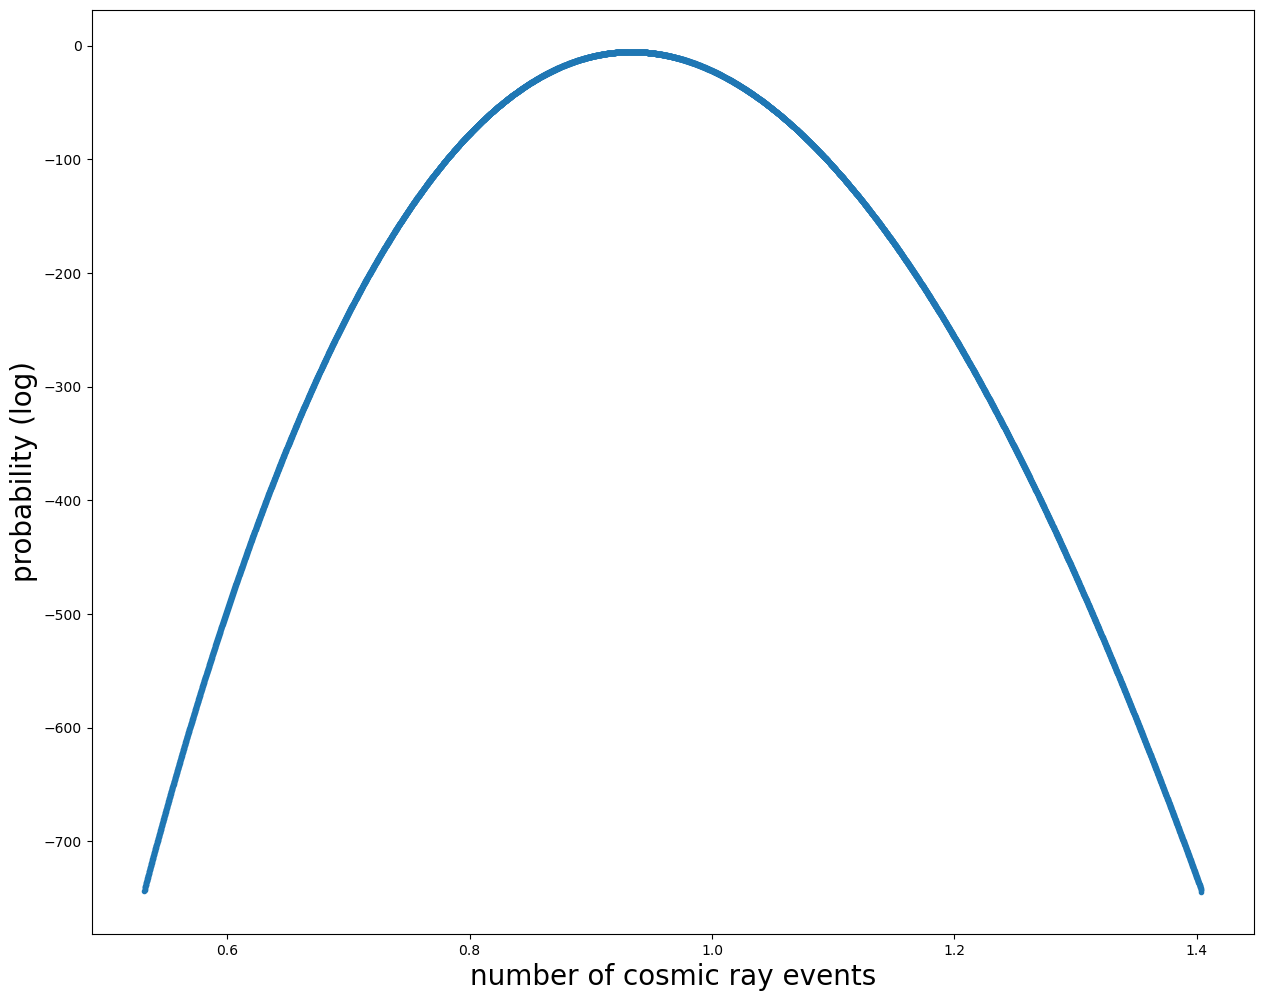

In [157]:
m = 1

x = np.arange(stats.poisson.ppf(0.000001, m), stats.poisson.ppf(0.999999, m))

pois_dist = stats.poisson.pmf(x, m)


change_dist = pois_dist
base = change_dist


    
days_num = 15
mins_num = 480

for i in range(1, days_num):
    for i in range(1, mins_num):
        conv = np.convolve(change_dist, base)
        change_dist = conv
    conv = np.convolve(change_dist, base)
    change_dist = conv
    
fig, ax = plt.subplots(1, 1)

x_conv = np.arange(len(conv))/(days_num * mins_num) #divided by number_of_days*mins_per_day

plt.plot(x_conv, np.log(conv), '.')

plt.xlabel("number of cosmic ray events", size = 20)
plt.ylabel("probability (log)", size = 20)

#### Part B

The unique shape of the distribution convoluted so many times made it difficult for me to wrap my head around and use built in functions (particularly the 'mu' shape parameter). Using a continuous distribution would have made things much easier. Thus, I approximated the integral by taking the sum of the scaled-down convolution.

In [176]:
conv[0:6800]

sum(conv[0:6800]/6800)

0.00012129843769873602

#### Part C

We can see that the standard deviation of our many-times-convolved distribution is very small, even so, taking the integral of our distribution from 0 to our "measured_events" value should give us the probability that any data up to our point would be measured.

In [177]:
conv[0:6800]

stats.norm.ppf((1/6800) * sum(conv[0:6800]))

-3.669951096796181

3.6 sigma seems small, but it's possible approximating the integral with the values of conv is not the best solution.